In [2]:
##import python libraries
import os,  random,cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
%matplotlib inline 

##import keras using tensorflow backend
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Convolution2D, MaxPooling2D, ZeroPadding2D, Dense, Activation
from keras.optimizers import RMSprop, Adam
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras import backend as K
##for resizing the image to 90*160 pixel and used color images that's why channel =3
ROWS = 90 #720
COLS = 160
channel=3

Using TensorFlow backend.


In [3]:
TRAIN_DIR='D:/book/images/images/'
from sklearn.model_selection import train_test_split
##four classes for cow in "other" folder there are multiple cow pics in one image 
COW_CLASSES = ['right','left','front','other']
import os

def get_images(cow):
    """Load files from train folder"""
    cow_dir = TRAIN_DIR+'{}'.format(cow)
    images = [cow+'/'+im for im in os.listdir(cow_dir)]
    return images
##read and resize images through opencv
def read_image(src):
    """Read and resize individual images"""
    im = cv2.imread(src)
    im = cv2.resize(im, (COLS, ROWS), interpolation=cv2.INTER_CUBIC)
    return im
files = []
y_all = []
##this loop count all photos in multiple folder
for cow in COW_CLASSES:
    cow_files = get_images(cow)
    files.extend(cow_files)
    
    y_cow = np.tile(cow, len(cow_files))
    y_all.extend(y_cow)
    print("{0} photos of {1}".format(len(cow_files), cow))
    
y_all = np.array(y_all)

50 photos of right
60 photos of left
89 photos of front
72 photos of other


In [4]:
X_all = np.ndarray((len(files), ROWS, COLS,channel), dtype=np.uint8)
##this loop transfer all images to 90*160 pixel
for i, im in enumerate(files): 
    X_all[i] = read_image(TRAIN_DIR+im)
    if i%50 == 0: print('Processed {} of {}'.format(i, len(files)))

print(X_all.shape)

Processed 0 of 271
Processed 50 of 271
Processed 100 of 271
Processed 150 of 271
Processed 200 of 271
Processed 250 of 271
(271, 90, 160, 3)


In [5]:
##cnn model it uses gradient descent optimizer rmsprop and for loss uses categorical cross entropy
##and activation function for hidden layer uses relu and for output layer uses softmax 

optimizer = RMSprop(lr=1e-4)
objective = 'categorical_crossentropy'

def center_normalize(x):
    return (x - K.mean(x)) / K.std(x)

model = Sequential()

model.add(Activation(activation=center_normalize, input_shape=(ROWS, COLS, channel)))

model.add(Convolution2D(32, 5, 5, border_mode='same', activation='relu', dim_ordering='tf'))
model.add(Convolution2D(32, 5, 5, border_mode='same', activation='relu', dim_ordering='tf'))
model.add(MaxPooling2D(pool_size=(2, 2), dim_ordering='tf'))

model.add(Convolution2D(64, 3, 3, border_mode='same', activation='relu', dim_ordering='tf'))
model.add(Convolution2D(64, 3, 3, border_mode='same', activation='relu', dim_ordering='tf'))

model.add(MaxPooling2D(pool_size=(2, 2), dim_ordering='tf'))

model.add(Convolution2D(128, 3, 3, border_mode='same', activation='relu', dim_ordering='tf'))
model.add(Convolution2D(128, 3, 3, border_mode='same', activation='relu', dim_ordering='tf'))

model.add(MaxPooling2D(pool_size=(2, 2), dim_ordering='tf'))

model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu', dim_ordering='tf'))
model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu', dim_ordering='tf'))
model.add(MaxPooling2D(pool_size=(2, 2), dim_ordering='tf'))


model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(len(COW_CLASSES)))
model.add(Activation('softmax'))

model.compile(loss=objective, optimizer=optimizer)

C:\Users\Afnan\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), activation="relu", data_format="channels_last", padding="same")`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Afnan\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), activation="relu", data_format="channels_last", padding="same")`
  if sys.path[0] == '':
C:\Users\Afnan\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(data_format="channels_last", pool_size=(2, 2))`
  del sys.path[0]
C:\Users\Afnan\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", data_format="channels_last", padding="same")`
 

In [6]:
# One Hot Encoding Labels
y_all = LabelEncoder().fit_transform(y_all)
y_all = np_utils.to_categorical(y_all)

X_train, X_valid, y_train, y_valid = train_test_split(X_all, y_all, 
                                                    test_size=0.2, random_state=23, 
                                                    stratify=y_all)

In [30]:
##early_stopping = EarlyStopping(monitor='val_loss', patience=4, verbose=1, mode='auto')
##firstly train model with early stopping to avoid overfitting but this not works well loss  stops at 0.66 but without 
##early stopping my training loss is 0.09 
        
        
model.fit(X_train, y_train, batch_size=32, nb_epoch=50,
              validation_split=0.2, verbose=1, shuffle=True)

C:\Users\Afnan\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


Train on 172 samples, validate on 44 samples
Epoch 1/50
172/172 [==============================] - 7s 41ms/step - loss: 0.6869 - val_loss: 1.0832
Epoch 2/50
172/172 [==============================] - 7s 39ms/step - loss: 0.6013 - val_loss: 1.3572
Epoch 3/50
172/172 [==============================] - 7s 39ms/step - loss: 0.5267 - val_loss: 1.2054
Epoch 4/50
172/172 [==============================] - 7s 39ms/step - loss: 0.6810 - val_loss: 1.1905
Epoch 5/50
172/172 [==============================] - 7s 39ms/step - loss: 0.5253 - val_loss: 1.1708
Epoch 6/50
172/172 [==============================] - 7s 39ms/step - loss: 0.4858 - val_loss: 1.2204
Epoch 7/50
172/172 [==============================] - 7s 39ms/step - loss: 0.5511 - val_loss: 1.1713
Epoch 8/50
172/172 [==============================] - 7s 39ms/step - loss: 0.4375 - val_loss: 1.2388
Epoch 9/50
172/172 [==============================] - 7s 39ms/step - loss: 0.5201 - val_loss: 1.3736
Epoch 10/50
172/172 [=========================

In [31]:

preds = model.predict(X_valid, verbose=1)
print("Validation Log Loss: {}".format(log_loss(y_valid, preds)))

55/55 [==============================] - 1s 18ms/step
Validation Log Loss: 2.3746939093967696


In [32]:
TEST_DIR='D:/book/images/images/test_pose/'
test_files = [im for im in os.listdir(TEST_DIR)]
test = np.ndarray((len(test_files), ROWS, COLS, channel), dtype=np.uint8)
##for testing this loop read images from test folder
for i, im in enumerate(test_files): 
    test[i] = read_image(TEST_DIR+im)
    
test_preds = model.predict(test, verbose=1)
#test_preds = model.predict(test, verbose=1)

8/8 [==============================] - 2s 278ms/step


In [39]:
submission = pd.DataFrame(test_preds, columns=COW_CLASSES)
submission.insert(0, 'image', test_files)
submission

,image,right,left,front,other
0,IMAG0639.jpg,5.520527e-02,0.062076,0.875244,0.007475
1,IMAG0709.jpg,1.752191e-05,0.002630,0.000024,0.997328
2,IMAG0780.jpg,8.186417e-01,0.004197,0.107473,0.069688
3,IMAG0796.jpg,8.863588e-01,0.050141,0.062732,0.000769
4,IMG_20180513_120755.jpg,9.227803e-07,0.976003,0.023757,0.000239
5,IMG_20180513_120940.jpg,9.596821e-01,0.022230,0.006323,0.011765
6,left_pose.jpg,3.987280e-05,0.996762,0.000360,0.002838
7,left_pose2.jpg,1.344890e-03,0.985727,0.003995,0.008933


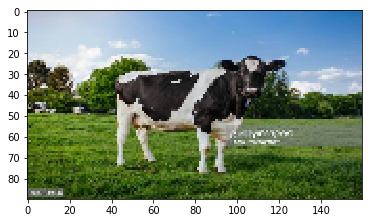

In [43]:
plt.imshow(cv2.cvtColor(X_all[5],cv2.COLOR_BGR2RGB))

In [44]:
y_all[5]

array([0., 0., 0., 1.], dtype=float32)

In [15]:
import tensorflow as tf
with tf.device('/gpu:0'):
    a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
    b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
    c = tf.matmul(a, b)
with tf.Session() as sess:
    print (sess.run(c))

[[22. 28.]
 [49. 64.]]
